In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('data.csv')

In [3]:
print(data.head())

   temperature     voltage    current  failure
0    42.472407  209.256646   7.617057        1
1    77.042858  227.095047   7.469788        1
2    63.919637  243.647292  14.062546        1
3    55.919509  236.611244   7.495462        0
4    29.361118  240.328057   7.719497        0


In [4]:
features = ['temperature', 'voltage', 'current']
target = 'failure'

In [5]:
data = data.dropna()

In [6]:
X = data[features]
y = data[target]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = model.predict(X_test)

In [11]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 76   0]
 [  0 124]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00       124

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy Score: 1.0


In [12]:
importances = model.feature_importances_
for feature, importance in zip(features, importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: temperature, Importance: 0.21483184043944356
Feature: voltage, Importance: 0.5100753760102783
Feature: current, Importance: 0.27509278355027816


In [13]:
import joblib
joblib.dump(model, 'predictive_maintenance_model.pkl')

['predictive_maintenance_model.pkl']

In [14]:
df = pd.read_csv('data.csv')
print(df.head())

   temperature     voltage    current  failure
0    42.472407  209.256646   7.617057        1
1    77.042858  227.095047   7.469788        1
2    63.919637  243.647292  14.062546        1
3    55.919509  236.611244   7.495462        0
4    29.361118  240.328057   7.719497        0


In [15]:
print("\nInfo: ")
print(df.info())

print("\nDescribe: ")
print(df.describe())

print("\nFailure Value Counts: ")
print(df['failure'].value_counts())

print("\nPercentage distribution: ")
print(df['failure'].value_counts(normalize=True) * 100)


Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  1000 non-null   float64
 1   voltage      1000 non-null   float64
 2   current      1000 non-null   float64
 3   failure      1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB
None

Describe: 
       temperature      voltage      current      failure
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     49.415393   225.350865    10.024057     0.600000
std      17.528242    14.609495     2.906742     0.490143
min      20.277921   200.160913     5.000116     0.000000
25%      34.158396   212.053714     7.613510     0.000000
50%      49.808443   225.936695    10.006139     1.000000
75%      64.659175   238.023253    12.591035     1.000000
max      79.983060   249.970686    14.978209     1.000000

Failure Value Counts: 
failure
1    600
0   

In [16]:
print(df.columns)

Index(['temperature', 'voltage', 'current', 'failure'], dtype='object')


In [17]:
correlation_matrix = df.corr()
print(correlation_matrix['failure'].sort_values(ascending=False))

failure        1.000000
current        0.307616
temperature    0.235423
voltage       -0.533989
Name: failure, dtype: float64


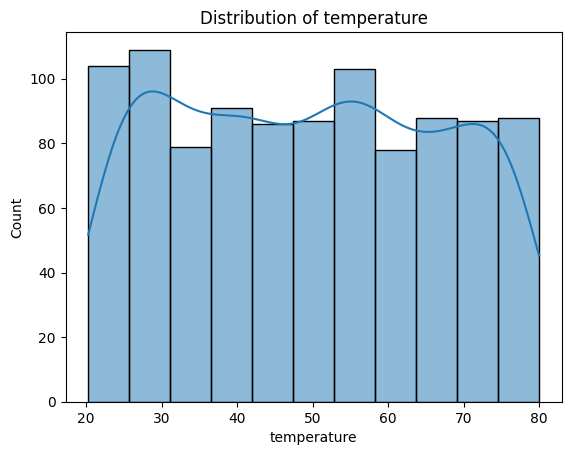

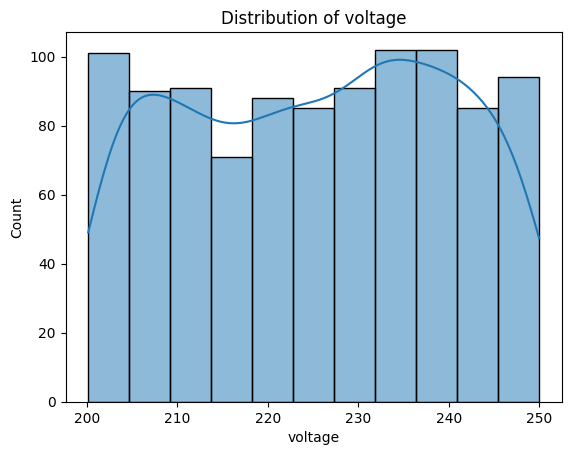

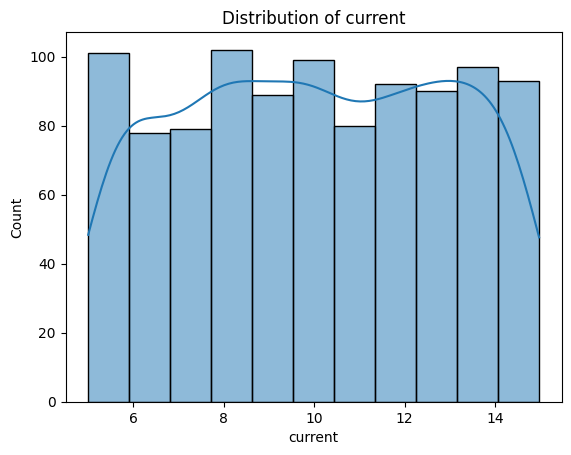

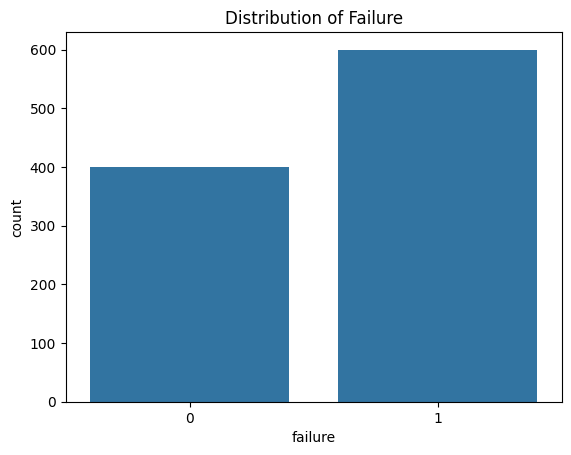

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['temperature', 'voltage', 'current']
for feature in features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

sns.countplot(x='failure', data=df)
plt.title('Distribution of Failure')
plt.show()


In [19]:
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': ['temperature', 'voltage', 'current'],  # Replace with your feature names
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

       Feature  Importance
1      voltage    0.510075
2      current    0.275093
0  temperature    0.214832


In [20]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
print("Key Features: Temperature, Voltage, Current.")
print("Target Variable: 'Failure', with the following distribution:")
print(df['failure'].value_counts(normalize=True) * 100)
print("Feature correlations with the target variable:")
print(correlation_matrix['failure'].sort_values(ascending=False))

The dataset contains 1000 rows and 4 columns.
Key Features: Temperature, Voltage, Current.
Target Variable: 'Failure', with the following distribution:
failure
1    60.0
0    40.0
Name: proportion, dtype: float64
Feature correlations with the target variable:
failure        1.000000
current        0.307616
temperature    0.235423
voltage       -0.533989
Name: failure, dtype: float64


Confusion Matrix:
[[ 76   0]
 [  0 124]]


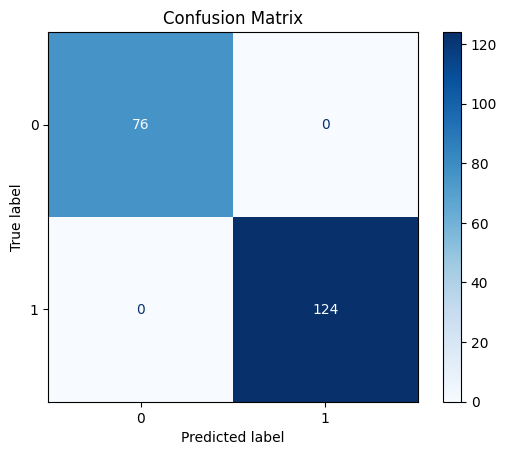

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test (actual values) and y_pred (predicted values) are available
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')  # You can change the color map
plt.title("Confusion Matrix")
plt.show()


In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [1.   1.   1.   1.   0.99]
Mean accuracy: 0.998


In [23]:
print(y.value_counts())


failure
1    600
0    400
Name: count, dtype: int64


In [24]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00       124

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



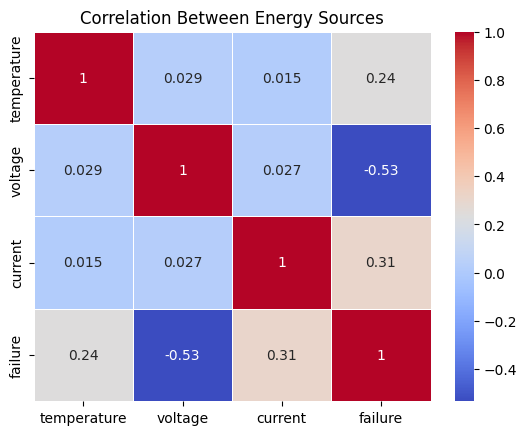

In [25]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Between Energy Sources')
plt.show()

In [26]:
print(df.corr()['failure'])

temperature    0.235423
voltage       -0.533989
current        0.307616
failure        1.000000
Name: failure, dtype: float64


array([[<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'voltage'}>],
       [<Axes: title={'center': 'current'}>,
        <Axes: title={'center': 'failure'}>]], dtype=object)

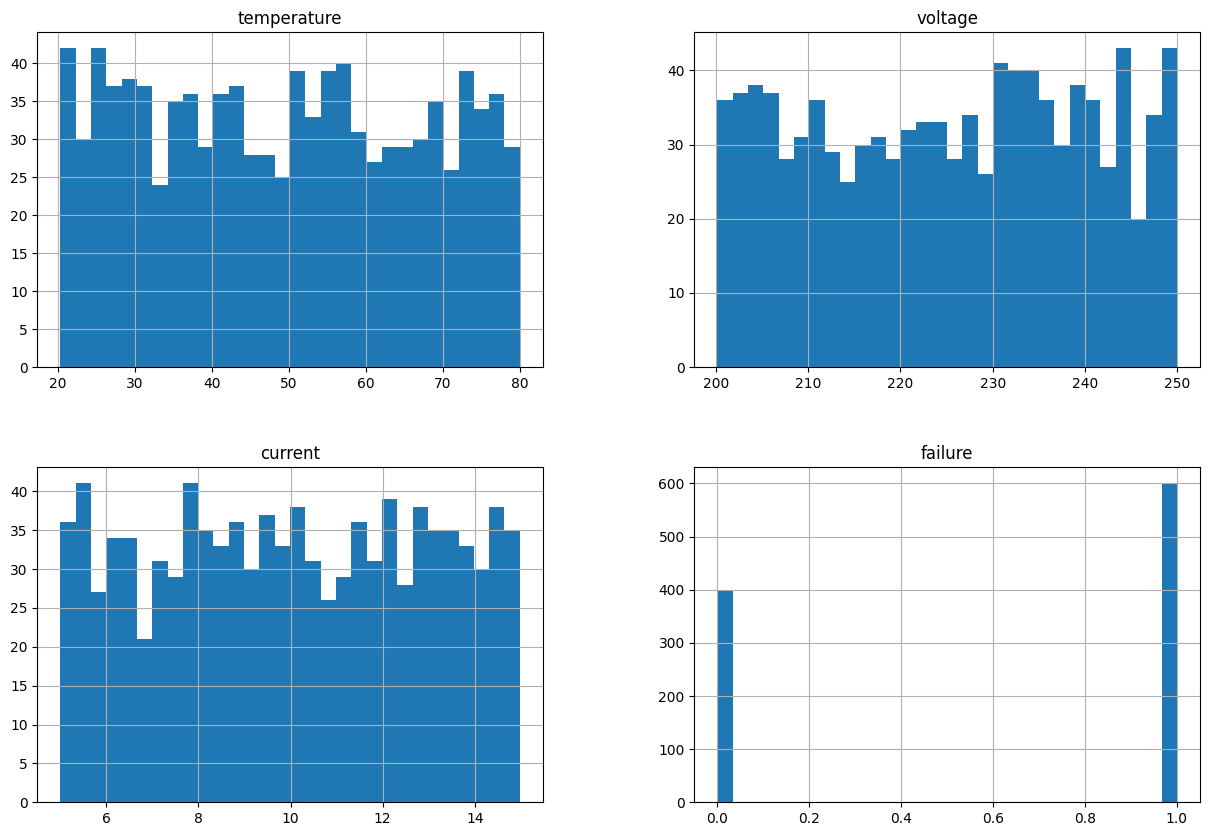

In [27]:
df.hist(bins=30, figsize=(15, 10))

In [28]:
print(df['failure'].value_counts())

failure
1    600
0    400
Name: count, dtype: int64


In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced')


In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 10], 'n_estimators': [100, 200]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10], 'n_estimators': [100, 200]})

In [33]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)


Cross-validation scores: [1.      1.      0.99375 1.      0.9875 ]


In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[ 76   0]
 [  0 124]]


In [35]:
#model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [36]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("AUC-ROC:", roc_score)


AUC-ROC: 1.0
